In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_dataframes(prefix, n_run, n=None):
#     prefix = "msg_QNN_Jan25_1710"
#     n_run = 12
    if n is None:
        n = n_run
    files = [prefix + "_{}.log".format(i) for i in range(n)]
    file_list = ['./log/index/'+ prefix +'_x{}/'.format(n_run) +'index_'+file+'.csv' for file in files]
    df_list = [None]*n
    for i in range(n):
        t = time.time()
        df = pd.read_csv(file_list[i], delimiter=';', index_col=0)
        df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
        df.set_index('start_ts', inplace=True)
        df['total_reward'] = df['tr_reward'] + df['op_cost']
        df_list[i] = df
        print df.shape,
        print files[i],
        print "{:.2f} sec".format(time.time()-t)
    return df_list    

In [3]:
def get_step_reward(file_prefix, num_total, num_load):
    # df_list = load_dataframes("msg_DynaQNN_Jan30_2313", 14, 14)
    df_list = load_dataframes(file_prefix, num_total, num_load)
    df_list = filter(lambda x: x.shape[0]==302400, df_list)
    start = pd.to_datetime("2014-10-16 9:30:00")
    end = pd.to_datetime("2014-10-21 9:30:00")
    delta = pd.Timedelta('2 seconds')

    step_reward = np.zeros(len(df_list))
    for i, df in enumerate(df_list):
        df = df.loc[start:end]
        print (i, df.shape[0])
        step = (df.index-df.index[0])/delta+1
        ts = df['total_reward'].cumsum()/step
        step_reward[i] = ts.iloc[-1]
    return step_reward

---

In [5]:
step_reward = get_step_reward("msg_DynaQNN_Feb5_1007", 14, 14)

(302400, 82) msg_DynaQNN_Feb5_1007_0.log 21.84 sec
(302400, 82) msg_DynaQNN_Feb5_1007_1.log 22.95 sec
(302400, 82) msg_DynaQNN_Feb5_1007_2.log 15.92 sec
(302400, 82) msg_DynaQNN_Feb5_1007_3.log 20.64 sec
(302400, 82) msg_DynaQNN_Feb5_1007_4.log 21.64 sec
(302400, 82) msg_DynaQNN_Feb5_1007_5.log 19.70 sec
(302400, 82) msg_DynaQNN_Feb5_1007_6.log 17.91 sec
(302400, 82) msg_DynaQNN_Feb5_1007_7.log 19.34 sec
(302400, 82) msg_DynaQNN_Feb5_1007_8.log 16.22 sec
(302400, 82) msg_DynaQNN_Feb5_1007_9.log 17.45 sec
(302400, 82) msg_DynaQNN_Feb5_1007_10.log 19.76 sec
(302400, 82) msg_DynaQNN_Feb5_1007_11.log 14.79 sec
(302400, 82) msg_DynaQNN_Feb5_1007_12.log 17.18 sec
(302400, 82) msg_DynaQNN_Feb5_1007_13.log 16.21 sec
(0, 216001)
(1, 216001)
(2, 216001)
(3, 216001)
(4, 216001)
(5, 216001)
(6, 216001)
(7, 216001)
(8, 216001)
(9, 216001)
(10, 216001)
(11, 216001)
(12, 216001)
(13, 216001)


/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


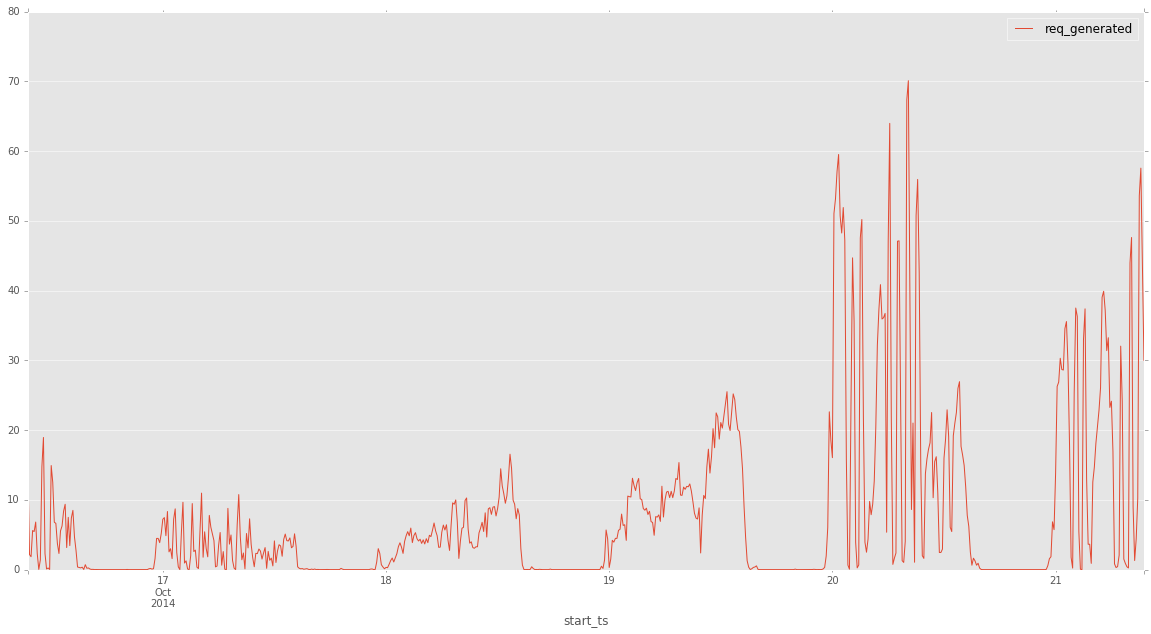

In [11]:
# df_list = load_dataframes("msg_QNN_Feb1_1740", 14, 14)
start = pd.to_datetime("2014-10-16 9:30:00")
end = pd.to_datetime("2014-10-21 9:30:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
for i, df in enumerate(df_list[0:1]):
    df = df.loc[start:end]
#     step = (df.index-df.index[0])/delta+1
#     ts = df.belief_last_t.resample('60Min')
#     ts = df.score_model_diff.resample('60Min')
    ts = df.req_generated.resample('10Min')
#     ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
#     ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
#             style=styles[i], 
#            ylim=(-1, -0.4),
           )

---

# QNN

In [5]:
# dormW, msg_QNN_Feb2_0944_x14 (14), phi=15, 45min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.83402, std 0.00689 10% -0.84709, 50% -0.84696, 90% -0.84682


# DynaQNN

n_bins = 100, \infty

In [7]:
# dormW, msg_DynaQNN_Feb2_0945_x14 (14), num_sim=5, n_bins=100, 128min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.80191, std 0.00303 10% -0.80678, 50% -0.80676, 90% -0.80674


In [6]:
# dormW, msg_DynaQNN_Feb5_1007_x14 (14), num_sim=5, n_bins=\infty, 129min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.80226, std 0.00357 10% -0.80889, 50% -0.80888, 90% -0.80886


max_queue_length = 20,50,100  
No trend, 20 is just fine

In [6]:
# dormW, msg_DynaQNN_Feb5_1007_x14 (14), q=20, 129min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.80226, std 0.00357 10% -0.80889, 50% -0.80888, 90% -0.80886


In [20]:
# dormW, msg_DynaQNN_Feb6_2022_x14 (14), q=50, 129min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.80680, std 0.00336 10% -0.81334, 50% -0.81326, 90% -0.81318


In [18]:
# dormW, msg_DynaQNN_Feb6_2019_x14 (14), q=100, 129min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.80696, std 0.00334 10% -0.81074, 50% -0.81068, 90% -0.81062


# DynaQtable

n_sim=0-10,15,20

In [9]:
# dormW, msg_DynaQtable_Feb6_2215_x14 (14), num_sim=0
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.53423, std 0.03901 10% -1.59483, 50% -1.59433, 90% -1.59383


In [17]:
# dormW, msg_DynaQtable_Feb6_2220_x14 (14), num_sim=1
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.18190, std 0.01443 10% -1.20535, 50% -1.20489, 90% -1.20444


In [13]:
# dormW, msg_DynaQtable_Feb6_2216_x14 (14), num_sim=2
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.12158, std 0.01055 10% -1.13841, 50% -1.13835, 90% -1.13828


In [15]:
# dormW, msg_DynaQtable_Feb6_2219_x14 (14), num_sim=3
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.09562, std 0.00905 10% -1.11748, 50% -1.11676, 90% -1.11605


In [22]:
# dormW, msg_DynaQtable_Feb6_2221_x14 (14), num_sim=4
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.07937, std 0.00754 10% -1.09214, 50% -1.09186, 90% -1.09158


In [14]:
# dormW, msg_DynaQtable_Feb6_2008_x14 (14), num_sim=5
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.05978, std 0.00565 10% -1.06707, 50% -1.06702, 90% -1.06697


In [20]:
# dormW, msg_DynaQtable_Feb6_2222_x14 (14), num_sim=6
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.05112, std 0.00978 10% -1.07437, 50% -1.07354, 90% -1.07272


In [6]:
# dormW, msg_DynaQtable_Feb6_2224_x14 (14), num_sim=7, 51min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.04132, std 0.00637 10% -1.05265, 50% -1.05252, 90% -1.05240


In [11]:
# dormW, msg_DynaQtable_Feb6_2218_x14 (14), num_sim=8
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.03411, std 0.00886 10% -1.05073, 50% -1.05069, 90% -1.05066


In [19]:
# dormW, msg_DynaQtable_Feb7_2225_x14 (7), num_sim=9, 53min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.02455, std 0.00711 10% -1.03779, 50% -1.03760, 90% -1.03740


In [17]:
# dormW, msg_DynaQtable_Feb7_2213_x14 (7), num_sim=10
# dormW, msg_DynaQtable_Feb7_2223_x14 (14), num_sim=10, 55min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.01867, std 0.00743 10% -1.02965, 50% -1.02954, 90% -1.02943


In [21]:
# dormW, msg_DynaQtable_Feb7_2226_x14 (14), num_sim=15
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.99629, std 0.00623 10% -1.00675, 50% -1.00668, 90% -1.00661


In [19]:
# dormW, msg_DynaQtable_Feb7_2225_x14 (14), num_sim=20, 67min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.02455, std 0.00711 10% -1.03779, 50% -1.03760, 90% -1.03740


n_bins = 2,5,7,10,15,25,50,100,500,1k,10k  
Strangly 2 is the best, choose 10

In [26]:
# dormW, msg_DynaQtable_Feb7_1324_x14 (14), num_sim=5, n_bins=2, 50min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -0.99351, std 0.00692 10% -1.00253, 50% -1.00249, 90% -1.00245


In [22]:
# dormW, msg_DynaQtable_Feb7_1052_x14 (14), num_sim=5, n_bins=5, 50min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.03553, std 0.00699 10% -1.04529, 50% -1.04524, 90% -1.04519


In [29]:
# dormW, msg_DynaQtable_Feb7_1609_x14 (14), num_sim=5, n_bins=7, 50min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.04711, std 0.00707 10% -1.05825, 50% -1.05812, 90% -1.05799


In [14]:
# dormW, msg_DynaQtable_Feb6_2008_x14 (14), num_sim=5, n_bins=10, 50min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.05978, std 0.00565 10% -1.06707, 50% -1.06702, 90% -1.06697


In [24]:
# dormW, msg_DynaQtable_Feb7_1053_x14 (14), num_sim=5, n_bins=15, 50min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.07498, std 0.00943 10% -1.08950, 50% -1.08921, 90% -1.08892


In [16]:
# dormW, msg_DynaQtable_Feb6_2010_x14 (14), num_sim=5, n_bins=25, 50min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.09543, std 0.01077 10% -1.11003, 50% -1.10988, 90% -1.10972


In [10]:
# dormW, msg_DynaQtable_Feb6_1543_x14 (14), num_sim=5, n_bins=50, 50min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.12654, std 0.00727 10% -1.14438, 50% -1.14379, 90% -1.14320


In [10]:
# dormW, msg_DynaQtable_Feb2_0946_x14 (14), num_sim=5, n_bins=100, 50min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.14817, std 0.00843 10% -1.15912, 50% -1.15895, 90% -1.15878


In [12]:
# dormW, msg_DynaQtable_Feb6_1544_x14 (14), num_sim=5, n_bins=250, 50min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.18050, std 0.01548 10% -1.21005, 50% -1.20984, 90% -1.20962


In [7]:
# dormW, msg_DynaQtable_Feb6_1542_x14 (14), num_sim=5, n_bins=500, 50min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.19340, std 0.01907 10% -1.22038, 50% -1.22019, 90% -1.22001


In [10]:
# dormW, msg_DynaQtable_Feb5_1015_x14 (14), num_sim=5, n_bins=1k, 50min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.22067, std 0.01893 10% -1.27591, 50% -1.27369, 90% -1.27146


In [13]:
# dormW, msg_DynaQtable_Feb5_1022_x14 (14), num_sim=5, n_bins=10k, 50min
print "mean {:.5f}, std {:.5f}".format(step_reward.mean(), step_reward.std()),
print "10% {:.5f}, 50% {:.5f}, 90% {:.5f}".format(*np.percentile(step_reward, [0.1, 0.5, 0.9]))

mean -1.30570, std 0.01598 10% -1.33125, 50% -1.33083, 90% -1.33041
